# Chapter Building Visual Question-Answering System

## Book and Chapter #:
Multimodal AI In Action, Chapter 4

## Chapter Title:
Building Visual Question-Answering System

## Take-Aways:
What is this chapter about? What are the 3-5 most important SKILLS (not facts), to be learned from this chapter. Not the 50 details, the few, key skills (and maybe concepts).

- Build an AI model (based on SAN architecture https://arxiv.org/pdf/1511.02274) to answer textual questions about images
- Generate text and image embeddings for questions and querying images to learn meaningful representations of multimodal data.
- Attend to querying image using stacked attention – at each layer in stack, we fuse question embedding with an embedding that encode question and attended image from previous layer.
    - This helps in attending to specific regions in querying image that relates better to an answer.
- Train the model to answer questions about a given image. Questions would have one word “yes/no”, “color”, “number” type of answers. Eg. “How many xyz in the picture?”, “Is there a xyz in the picture?”, “What color is xyz in the picture?”.

## Why? Who Cares?
This is sometimes called the BBQ pitch or the elevator pitch. In one or two paragraphs, explain why and when - in practice - the reader should care about the topics in this chapter. Why is this chapter in the book? You’ll provide this information in expanded form in your introduction to this chapter.

So far, we have understood how to combine image and text representations to either match or generate data in multiple modalities. In this chapter, we combine multiple modalities to understand both the modalities (text in the form of question and image as querying picture) simultaneously to generate a textual answer. This problem is more intuitive since in order to answer a question about an image, humans need to not only understand the text (language) of the question and different elements/objects in the given image, but also need to associate particular sections of images with parts of the question in order to answer the question. We will achieve this multimodality in an AI model that we will build in this chapter.

## Prerequisites:
We always assume we have an MQR for the whole book. This section enumerates the topics the reader learned earlier in the book that will be necessary to learn this chapter's topics.
•	Image and text embeddings
•	LSTM, CNN networks
•	Attention matrix

## Scenarios in Chapter:
Every hard topic in the chapter should start with a Concrete Example (CE), and CEs start with a scenario. A well thought out CE scenario drives the teaching. Further, your editor can tell a lot about the chapter plan from reading these scenarios. Note: One way to create a good scenario is to document what makes this topic hard to learn, in other words, what are the “obstacles” to learning.

### The overall architecture of the Stacked Attention Network (SAN)
Imagine a scenario where a user uploads a picture of a living room with a couch, a table with a vase of flowers, and a cat sleeping on the couch. The user then asks the question - "What color is the cat?". The SAN processes this query through three main components:
1. The Image Model: The uploaded image of the living room is fed into a Convolutional Neural Network (CNN), like VGGNet. This CNN extracts high-level visual features from the image. Instead of just one global feature vector for the entire image, the CNN outputs a feature map that retains spatial information, representing different regions of the image. For instance, there might be a feature vector for the region containing the couch, another for the table, another for the vase, the flowers, and importantly, one for the region where the cat is sleeping.
2.	The Question Model: The question "What color is the cat?" is processed by a question model, which can be either a Long Short-Term Memory network (LSTM) or another CNN. This model aims to understand the semantic meaning of the question and represent it as a question embedding vector. The LSTM would process the words sequentially, understanding the relationship between "color" and "cat". Similarly, the CNN would use filters (like unigrams, bigrams, trigrams) on the word embeddings to capture the question's meaning. The output is a dense vector that encodes the question's intent of asking the color of the cat.
3.	The Stacked Attention Model: This is where the core reasoning happens. The question vector acts as a query to search for the relevant regions in the image features extracted by the CNN. In the first attention layer, the question vector is used to highlight the image regions that are more relevant to the question asked. Regions that are deemed more relevant to the question (e.g., the region containing the cat, and perhaps the couch it's on) will receive higher attention weights. This attended visual information is then combined with the question embedding vector to form a refined query vector. This refined query, which now contains both question information and relevant visual hints, is passed to the next attention layer to repeat the process. After multiple attention layers, the final refined query vector is used to predict the answer (e.g., "grey") through a final classification layer.

### The concept of multi-step reasoning via stacked attention layers
Considering the same example as above, a single step of reasoning might initially identify regions containing "couch", "table" and perhaps some other general "objects". However, it might not be precise enough to isolate the what is on the “couch” or on the “table”. Multi-step reasoning allows the SAN to refine its focus progressively:
- First Attention Layer: The question vector first queries the image and might broadly attend to regions like a couch with a cat, table and the vase, and some undefined objects within the living room area, like walls, ceiling etc. The model recognizes the presence of these entities mentioned in the question.
- Second Attention Layer: The output of the first layer (attended visual features combined with the question vector) creates a refined query. This refined query now specifically looks for something sitting on the couch that looks like a cat. The second attention layer becomes much sharper, focusing specifically on the region on the couch that contains the cat. It has effectively filtered out irrelevant objects and pinpointed the visual clues leading to the answer.
In general, the attention mechanism acts like a spotlight, highlighting the parts of the image that are most likely to contain information needed to answer the question.

### The different question encoding methods (LSTM and CNN)
Consider the question: "Is there a cat on the couch?".
- LSTM based question model: The words are processed sequentially: "Is" ->"there" ->"a" ->"cat" ->"on" ->"the" ->"couch". At each step, the LSTM updates its internal memory based on the current word and the previous state. The final hidden state of the LSTM after processing the entire question is taken as the representation vector of the question, capturing the semantic dependencies between the words and the overall meaning. For example, the LSTM learns that "cat" and "couch" are related by the preposition "on".
- CNN based question model: First, each word in the question is embedded into a vector space. So, "Is" becomes x1, "there" becomes x2, and so on. The entire sequence of t word embeddings [x1, x2, ..., xt] represents the question. Then, convolutional filters of different window sizes are applied to these embeddings.
    - A unigram filter (size 1) might capture the meaning of individual words like "cat" and "couch".
    - A bigram filter (size 2) might capture the meaning of pairs of adjacent words like "on the".
    - A trigram filter (size 3) might capture phrases like "a cat on".
The outputs of these filters, after some processing through non-linear activation function and max pooling, are then concatenated to form the final question vector.

### Stacked attention vs Single attention
Consider a more complex scenario: An image shows a blue car parked next to a red bicycle. The question is: "What is the color of the vehicle?".
A single-attention model might broadly attend to both the car and the bicycle since both are types of "vehicles". If the model then tries to extract a single representation based on this broad attention, it might get confused between "blue" and "red" or be less confident in its answer. 
In contrast, a SAN with multiple attention layers can perform more sophisticated reasoning. In the first attention layer, the question "What is the color of the vehicle?" might initially attend to both the car and the bicycle regions. The refined query from the first layer, now knowing we are looking for the "color" of a "vehicle", can be used to further discriminate in the second attention layer. The model might implicitly learn that "car" is a more typical interpretation of "vehicle" in some contexts or that it's visually more prominent in the attended regions. This could lead the second attention layer to focus more strongly on the car region specifically. By focusing more precisely on the car, the subsequent steps of aggregating features and predicting the answer will be more accurate in determining the answer for the color of the car as "blue".

## Key Diagrams:
Provide rough sketches (or better) of the "centerpiece" diagrams you'll use in your chapter.
•	Visual Question Answering overview with examples.
•	Overview of the architecture of SAN
•	Image Model architecture
•	Question Model architecture (LSTM)
•	Question Model architecture (CNN)
•	Stacked Attention Network
•	Examples of attended images in different attention layers

## Exercises: 
You don’t need to plan exercises but we strongly encourage you to add them

## 4.1 Download and preprocess dataset

### 4.1.2 Load and preprocess VQA dataset

In [1]:
%pip install pandas
%pip install utils
%pip install tensorboardX


[notice] A new release of pip is available: 24.3.1 -> 25.1.1
[notice] To update, run: python3.10 -m pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.

[notice] A new release of pip is available: 24.3.1 -> 25.1.1
[notice] To update, run: python3.10 -m pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.

[notice] A new release of pip is available: 24.3.1 -> 25.1.1
[notice] To update, run: python3.10 -m pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [2]:
import os
import json
import pandas as pd
from IPython.display import display

In [3]:
import torch
from torch.utils.data import Dataset, DataLoader
from torchvision import transforms
from PIL import Image

In [4]:
data_dir = '/Users/rajatgoel/Documents/Manning Book Multimodal AI/Personal Git Repo/data/Ch04'
# data_dir = os.path.join(os.getcwd(), 'data/Ch04')

#### Create Answer to Answer ID Mapping File

In [5]:
def create_answer_mapping(data_dir):
    annotation_file = os.path.join(data_dir, f'v2_mscoco_train2014_annotations.json')
    
    with open(annotation_file, 'r') as f:
        annotations = json.load(f)['annotations']

    answer_to_id = {}
    id_to_answer = []
    id = 0
    for annotation in annotations:
        for answer in annotation['answers']:
            if answer['answer'] not in answer_to_id:
                answer_to_id[answer['answer']] = id
                id_to_answer.append(
                    {
                    'answer': answer['answer'], 
                    'frequency': 1
                    }
                )
                id += 1
            else:
               id_to_answer[answer_to_id[answer['answer']]]['frequency'] += 1

    sorted_mapping = sorted(id_to_answer, key=lambda x: x['frequency'], reverse=True)
    sorted_mapping = [{'answer_id': i, **d} for i, d in enumerate(sorted_mapping)]
    return pd.DataFrame(sorted_mapping)

In [6]:
answer_mapping_df = create_answer_mapping(data_dir)

In [7]:
display(answer_mapping_df)

,answer_id,answer,frequency
0,0,no,834552
1,1,yes,825565
2,2,2,122798
3,3,1,121020
4,4,white,80726
...,...,...,...
162491,162491,improved functionality,1
162492,162492,two computers,1
162493,162493,to talk to each other,1
162494,162494,different uses,1


In [8]:
answer_mapping_file = os.path.join(os.getcwd(), 'answer_mapping.json')
answer_mapping_df.to_json(answer_mapping_file, orient='records')

#### Create Word to Index mapping from Questions

In [9]:
from collections import Counter

In [10]:
def get_word2index_mapping_df(data_dir):
    question_file = os.path.join(data_dir, f'v2_OpenEnded_mscoco_train2014_questions.json')
    with open(question_file, 'r') as f:
        questions_df = pd.DataFrame(json.load(f)['questions'])
    questions = questions_df['question']

    all_words = []
    for text in questions:
        if isinstance(text, str):
            words = text.lower().split()  # Simple split by whitespace
            all_words.extend(words)
    word_frequencies = Counter(all_words)
    sorted_word_frequencies = sorted(word_frequencies.items(), key=lambda item: item[1], reverse=True)

    word_mapping = []
    idx = 0
    for word, freq in sorted_word_frequencies:
        word_mapping.append(
            {'index': idx, 'word': word, 'frequency': freq}
        )
        idx += 1
    
    word_mapping_df = pd.DataFrame(word_mapping)
    return word_mapping_df

In [11]:
word_mapping_df = get_word2index_mapping_df(data_dir)

In [12]:
display(word_mapping_df)

,index,word,frequency
0,0,the,322819
1,1,is,277120
2,2,what,184186
3,3,are,103976
4,4,this,75324
...,...,...,...
21137,21137,quacks?,1
21138,21138,fisher,1
21139,21139,gingerbread,1
21140,21140,merry,1


In [13]:
question_words_mapping_file = os.path.join(os.getcwd(), 'word_mapping.json')
word_mapping_df.to_json(question_words_mapping_file, orient='records')

#### Create Records from Question and Annotations

In [14]:
max_ans_index = 1500 # max number of answers to be predicted (top frequency answers selected)
max_ques_words = 1000 # max number of words in question vocabulary (top frequency words selected)

In [15]:
def merge_question_answers(data_dir, mode='train'):
    # Set file dirs
    annotation_file = os.path.join(data_dir, f'v2_mscoco_{mode}2014_annotations.json')
    question_file = os.path.join(data_dir, f'v2_OpenEnded_mscoco_{mode}2014_questions.json')
    
    with open(annotation_file, 'r') as f:
        annotation_df = pd.DataFrame(json.load(f)['annotations'])
    
    with open(question_file, 'r') as f:
        questions_df = pd.DataFrame(json.load(f)['questions'])

    merged_df = pd.merge(annotation_df, questions_df, on=('question_id', 'image_id'), how='inner')

    with open(answer_mapping_file, 'r') as f:
        answer_mapping_df = pd.DataFrame(json.load(f))
    truncated_answer_map_df = answer_mapping_df[:max_ans_index]

    joined_df = pd.merge(merged_df, truncated_answer_map_df, left_on='multiple_choice_answer', right_on='answer', how='left')
    joined_df = joined_df.drop('answer', axis=1) # drop duplicated column
    joined_df['frequency'] = joined_df['frequency'].fillna(1).astype(int)
    joined_df['answer_id'] = joined_df['answer_id'].fillna(max_ans_index).astype(int)

    columns_to_save = ['question_id', 'question', 'image_id', 'answer_id']
    joined_df = joined_df[columns_to_save]

    return joined_df

In [16]:
def encode_questions(joined_df, word_mapping_df, max_question_length=25, pad_token: str = '<pad>', unk_token: str = '<unk>'):
    word_to_index = pd.Series(word_mapping_df['index'].values, index=word_mapping_df['word']).to_dict()

    # Add padding and unknown tokens to the vocabulary if they are not already present
    if pad_token not in word_to_index:
        max_index = max(word_to_index.values()) if word_to_index else -1
        word_to_index[pad_token] = max_index + 1
    if unk_token not in word_to_index:
        max_index = max(word_to_index.values()) if word_to_index else -1
        word_to_index[unk_token] = max_index + 1

    encoded_questions_list = []
    for question_str in joined_df['question']:
        tokens = question_str.lower().split()  # Simple whitespace tokenization
        indices = [word_to_index.get(token, word_to_index.get(unk_token)) for token in tokens]

        # Padding and Truncating
        if len(indices) < max_question_length:
            indices = indices + [word_to_index[pad_token]] * (max_question_length - len(indices))
        else:
            indices = indices[:max_question_length]

        encoded_questions_list.append(indices)

    joined_df['encoded_question'] = encoded_questions_list
    return joined_df

In [17]:
train_records_df = merge_question_answers(data_dir, mode='train')

In [18]:
question_words_mapping_file = os.path.join(os.getcwd(), 'word_mapping.json')
word_mapping_df = pd.read_json(question_words_mapping_file)
train_records_df = encode_questions(train_records_df, word_mapping_df[:max_ques_words])

In [19]:
display(train_records_df)

,question_id,question,image_id,answer_id,encoded_question
0,458752000,What is this photo taken looking through?,458752,903,"[2, 1, 4, 78, 102, 98, 1001, 1000, 1000, 1000,..."
1,458752001,What position is this man playing?,458752,394,"[2, 708, 1, 4, 14, 91, 1000, 1000, 1000, 1000,..."
2,458752002,What color is the players shirt?,458752,23,"[2, 11, 1, 0, 332, 62, 1000, 1000, 1000, 1000,..."
3,458752003,Is this man a professional baseball player?,458752,1,"[1, 4, 14, 6, 473, 447, 780, 1000, 1000, 1000,..."
4,262146000,What color is the snow?,262146,4,"[2, 11, 1, 0, 415, 1000, 1000, 1000, 1000, 100..."
...,...,...,...,...,...
443752,524286001,What color is the keyboard?,524286,7,"[2, 11, 1, 0, 624, 1000, 1000, 1000, 1000, 100..."
443753,524286002,Is there a computer mouse on the desk?,524286,0,"[1, 12, 6, 224, 723, 8, 0, 436, 1000, 1000, 10..."
443754,524286003,What color is the computer?,524286,7,"[2, 11, 1, 0, 472, 1000, 1000, 1000, 1000, 100..."
443755,524286004,Why are there two keyboards?,524286,1500,"[47, 3, 12, 123, 1001, 1000, 1000, 1000, 1000,..."


In [20]:
train_records_output_file = os.path.join(os.getcwd(), 'train_records_output.json')
val_records_output_file = os.path.join(os.getcwd(), 'val_records_output.json')

In [21]:
train_records_df.to_json(train_records_output_file, orient='records')

In [22]:
val_records_df = merge_question_answers(data_dir, mode='val')
val_records_df = encode_questions(val_records_df, word_mapping_df[:max_ques_words])

In [23]:
display(val_records_df)

,question_id,question,image_id,answer_id,encoded_question
0,262148000,Where is he looking?,262148,110,"[18, 1, 41, 677, 1000, 1000, 1000, 1000, 1000,..."
1,262148001,What are the people in the background doing?,262148,495,"[2, 3, 0, 15, 5, 0, 331, 33, 1000, 1000, 1000,..."
2,262148002,What is he on top of?,262148,1500,"[2, 1, 41, 8, 97, 57, 1000, 1000, 1000, 1000, ..."
3,393225000,What website copyrighted the picture?,393225,1500,"[2, 1001, 1001, 0, 17, 1000, 1000, 1000, 1000,..."
4,393225001,Is this a creamy soup?,393225,0,"[1, 4, 6, 1001, 1001, 1000, 1000, 1000, 1000, ..."
...,...,...,...,...,...
214349,393212000,What is the main color in the photo?,393212,11,"[2, 1, 0, 440, 11, 5, 0, 32, 1000, 1000, 1000,..."
214350,393212001,What is the meaning of this sign?,393212,1500,"[2, 1, 0, 1001, 7, 4, 107, 1000, 1000, 1000, 1..."
214351,393212002,What is on the sign?,393212,1473,"[2, 1, 8, 0, 107, 1000, 1000, 1000, 1000, 1000..."
214352,393212003,Does the arrow point left or right?,393212,22,"[13, 0, 823, 1001, 94, 22, 211, 1000, 1000, 10..."


In [24]:
val_records_df.to_json(val_records_output_file, orient='records')

### 4.1.3 Save data loaders

In [25]:
class VQADataset(Dataset):
    def __init__(self, image_dir, records_file, transform, mode='train'):
        self.image_dir = image_dir
        self.transform = transform
        self.mode = mode
        with open(records_file, 'r') as f:
            self.records = json.load(f)

    def __len__(self):
        return len(self.records)

    def __getitem__(self, idx):
        record = self.records[idx]
        image_id = record['image_id']
        image_path = os.path.join(self.image_dir, f"COCO_{self.mode}2014_{image_id:012d}.jpg")
        image = Image.open(image_path).convert('RGB')
        image = self.transform(image)

        return {
            'question_id': record['question_id'],
            'question': torch.tensor(record['encoded_question'], dtype=torch.long),
            'image_id': image_id,
            'image': image,
            'answer_id': record['answer_id']
        }

In [26]:
# Create data loader
transform = transforms.Compose([
    transforms.Resize((448, 448)),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
])

In [27]:
train_image_dir = os.path.join(data_dir, 'train2014')
val_image_dir = os.path.join(data_dir, 'val2014')
train_records_output_file = os.path.join(os.getcwd(), 'train_records_output.json')
batch_size = 32

In [28]:
train_dataset = VQADataset(train_image_dir, train_records_output_file, transform, mode='train')
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)

In [29]:
val_dataset = VQADataset(val_image_dir, val_records_output_file, transform, mode='val')
val_loader = DataLoader(val_dataset, batch_size=batch_size, shuffle=True)

In [30]:
for batch in train_loader:
    print(len(batch))
    print(batch['question_id'][0])
    print(batch['question'][0])
    print(batch['image_id'][0])
    print(batch['image'][0].shape)
    print(batch['answer_id'][0])
    break # To get only one sample

5
tensor(489066000)
tensor([   1,    0, 1001, 1001,  226, 1000, 1000, 1000, 1000, 1000, 1000, 1000,
        1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000,
        1000])
tensor(489066)
torch.Size([3, 448, 448])
tensor(1)


In [31]:
torch.save(train_loader, os.path.join(os.getcwd(), 'train_loader.pth'))

In [32]:
torch.save(val_loader, os.path.join(os.getcwd(), 'val_loader.pth'))

## 4.2 Stacked Attention Network (SAN) Model

In [33]:
import torch.nn as nn
import torch.nn.functional as F
import torchvision.models as models
import utils

### 4.2.3 The image model

In [34]:
class ImageEmbedding(nn.Module):
    def __init__(self, output_size=1024, extract_features=True, features_dir=None):
        super(ImageEmbedding, self).__init__()
        self.cnn = models.vgg16(weights=models.VGG16_Weights.IMAGENET1K_V1).features

        for param in self.cnn.parameters():
            param.requires_grad = False
        self.fc = nn.Sequential(
            nn.Linear(512, output_size),
            nn.Tanh())
        
        self.extract_features = extract_features
        self.features_dir = features_dir

    def forward(self, image, image_ids):
        # Image shape: torch.Size([32, 3, 448, 448])
        if self.extract_features:
            # N * 3 * 448 * 448 -> N * 512 * 14 * 14
            image_features = self.cnn(image)
            # Image shape after CNN:  torch.Size([32, 512, 14, 14])
            # N * 512 * 14 * 14 -> N * 512 * 196 -> N * 196 * 512
            image_features = image_features.flatten(start_dim=2).transpose(1, 2)
            # Image shape after transpose:  torch.Size([32, 196, 512])
            if self.features_dir is not None:
                utils.save_image_features(image_features, image_ids, self.features_dir)
            # N * 196 * 512 -> N * 196 * 1024 to make it same dim as ques embedding
            image_embedding = self.fc(image_features)
            return image_embedding
        else:
            return self.fc(image)

### 4.2.4 The question model

In [35]:
class QuesEmbedding(nn.Module):
    def __init__(self, input_size=500, output_size=1024, batch_first=True):
        super(QuesEmbedding, self).__init__()
        self.lstm = nn.LSTM(input_size=input_size,
                            hidden_size=output_size, batch_first=batch_first)

    def forward(self, ques):
        # seq_len * N * 500 -> (1 * N * 1024, 1 * N * 1024) -> 1 * N * 1024
        _, (h, _) = self.lstm(ques) # get final hidden state and discard final cell state
        ques_embedding = h.squeeze(0) # get final hidden state 1 * N * 1024 -> N * 1024
        return ques_embedding

### 4.2.5 The attention model

In [36]:
class Attention(nn.Module):
    def __init__(self, d=1024, k=512, dropout=True):
        super(Attention, self).__init__()
        self.ff_image = nn.Linear(d, k)
        self.ff_ques = nn.Linear(d, k)
        if dropout:
            self.dropout = nn.Dropout(p=0.5)
        self.ff_attention = nn.Linear(k, 1)
        self._attention_weights = None # To store attention weights

    def forward(self, vi, vq):
        # N * 196 * 1024 -> N * 196 * 512
        hi = self.ff_image(vi)
        # N * 1024 -> N * 512 -> N * 1 * 512
        hq = self.ff_ques(vq).unsqueeze(dim=1)
        # N * 196 * 512
        ha = F.tanh(hi + hq)
        if getattr(self, 'dropout'):
            ha = self.dropout(ha)
        # N * 196 * 512 -> N * 196 * 1 -> N * 196
        ha = self.ff_attention(ha).squeeze(dim=2)
        pi = F.softmax(ha, dim=1)
        self._attention_weights = pi # Store attention weights
        # (N * 196 * 1, N * 196 * 1024) -> N * 1024
        vi_attended = (pi.unsqueeze(dim=2) * vi).sum(dim=1)
        u = vi_attended + vq
        return u

    @property
    def attention_weights(self):
        return self._attention_weights

### 4.2.6 Define SAN model

In [37]:
class SANModel(nn.Module):
    def __init__(self, vocab_size, word_emb_size=500, emb_size=1024, att_ff_size=512, output_size=1000,
                 num_att_layers=2, extract_img_features=True, features_dir=None):
        super(SANModel, self).__init__()
        self.features_dir = features_dir
        self.image_channel = ImageEmbedding(output_size=emb_size, extract_features=extract_img_features,
                                            features_dir=features_dir)

        self.word_emb_size = word_emb_size
        self.word_embeddings = nn.Embedding(vocab_size, word_emb_size)
        self.ques_channel = QuesEmbedding(
            word_emb_size, output_size=emb_size, batch_first=False)

        self.san = nn.ModuleList(
            [Attention(d=emb_size, k=att_ff_size)] * num_att_layers)

        self.mlp = nn.Sequential(
            nn.Dropout(p=0.5),
            nn.Linear(emb_size, output_size))

        self._attention_weights = [] # To store attention weights from all layers

    def forward(self, images, questions, image_ids):
        image_embeddings = self.image_channel(images, image_ids)
        embeds = self.word_embeddings(questions)
        ques_embeddings = self.ques_channel(embeds)
        vi = image_embeddings
        u = ques_embeddings
        self._attention_weights = [] # ensure we're collecting weights for the current input
        for att_layer in self.san:
            u = att_layer(vi, u)
            self._attention_weights.append(att_layer.attention_weights) # Collect attention weights
        output = self.mlp(u)
        return output

    @property
    def attention_weights(self):
        return self._attention_weights

In [38]:
model = SANModel(
    vocab_size=max_ques_words+2, # +2 for padding and unknown token
    word_emb_size=500, 
    emb_size=1024, 
    att_ff_size=512, 
    output_size=max_ans_index,
    num_att_layers=2,
    extract_img_features=True, 
    features_dir=None
)

## 4.3 Train SAN Model

In [39]:
# device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
device = torch.device("mps")

In [40]:
train_loader = torch.load(os.path.join(os.getcwd(), 'train_loader.pth'), weights_only=False)

In [41]:
val_loader = torch.load(os.path.join(os.getcwd(), 'val_loader.pth'), weights_only=False)

In [42]:
criterion = nn.CrossEntropyLoss()

In [43]:
optimizer = torch.optim.SGD(filter(lambda p: p.requires_grad, model.parameters()), momentum=0.9, lr=0.01, weight_decay=0.0005)

In [44]:
exp_lr_scheduler = torch.optim.lr_scheduler.StepLR(optimizer, step_size=7, gamma=0.1)

In [45]:
from tqdm import tqdm

In [46]:
def train(model, dataloader, criterion, optimizer, max_batches=None):
    model.train()  # Set model to training mode
    running_loss = 0.0
    running_corrects = 0
    example_count = 0
    model.to(device)

    # Initialize tqdm progress bar
    progress_bar = tqdm(dataloader, desc="Training", total= max_batches if max_batches else len(dataloader))

    curr_batch = 0
    for batch in progress_bar:
        question_ids = batch['question_id']
        questions = batch['question']
        image_ids = batch['image_id']
        images = batch['image']
        answer_ids = batch['answer_id']
        
        questions = questions.transpose(0, 1).to(device)
        images = images.to(device)
        answer_ids = answer_ids.to(device)
        image_ids = image_ids.to(device)
        
        # zero grad
        optimizer.zero_grad()

        # forward
        ans_scores = model(images, questions, image_ids)
        _, preds = torch.max(ans_scores, 1)
        loss = criterion(ans_scores, answer_ids)

        # backward + optimize
        loss.backward()
        optimizer.step()

        # statistics
        running_loss += loss.item()
        running_corrects += torch.sum(preds == answer_ids).item()
        example_count += answer_ids.size(0)
        
        # Update tqdm progress bar description
        progress_bar.set_postfix(loss=f"{running_loss / example_count:.4f}",
                               accuracy=f"{(running_corrects / example_count) * 100:.2f}%")

        curr_batch += 1
        if max_batches and curr_batch > max_batches:
            break

    # Final statistics
    loss = running_loss / example_count
    acc = (running_corrects / len(dataloader.dataset)) * 100
    print('Train Loss: {:.4f} Acc: {:2.3f} ({}/{})'.format(loss,
                                                           acc, running_corrects, example_count))
    return loss, acc

In [47]:
def validate(model, dataloader, criterion, max_batches=None):
    model.eval()  # Set model to evaluate mode
    running_loss = 0.0
    running_corrects = 0
    example_count = 0
    model.to(device)

    # Initialize tqdm progress bar
    progress_bar = tqdm(dataloader, desc="Training", total= max_batches if max_batches else len(dataloader))

    curr_batch = 0
    for batch in progress_bar:
        question_ids = batch['question_id']
        questions = batch['question']
        image_ids = batch['image_id']
        images = batch['image']
        answer_ids = batch['answer_id']
        
        questions = questions.transpose(0, 1).to(device)
        images = images.to(device)
        answer_ids = answer_ids.to(device)
        image_ids = image_ids.to(device)

        # forward
        ans_scores = model(images, questions, image_ids)
        _, preds = torch.max(ans_scores, 1)
        loss = criterion(ans_scores, answer_ids)

        # statistics
        running_loss += loss.item()
        running_corrects += torch.sum(preds == answer_ids).item()
        example_count += answer_ids.size(0)
        
        # Update tqdm progress bar description
        progress_bar.set_postfix(loss=f"{running_loss / example_count:.4f}",
                               accuracy=f"{(running_corrects / example_count) * 100:.2f}%")

        curr_batch += 1
        if max_batches and curr_batch > max_batches:
            break

    # Final statistics
    loss = running_loss / example_count
    acc = (running_corrects / len(dataloader.dataset)) * 100
    print('Validation Loss: {:.4f} Acc: {:2.3f} ({}/{})'.format(loss,
                                                           acc, running_corrects, example_count))
    return loss, acc

In [48]:
import shutil
import time

In [49]:
def save_checkpoint(save_dir, state, is_best):
    savepath = save_dir + '/' + 'checkpoint.pth.tar'
    torch.save(state, savepath)
    if is_best:
        shutil.copyfile(savepath, save_dir + '/' + 'model_best.pth.tar')

In [50]:
best_acc = 0
start_epoch = 0
num_epochs = 1
scheduler = exp_lr_scheduler

In [51]:
save_dir = os.path.join(os.getcwd(), 'san_lstm')
os.makedirs(save_dir, exist_ok=True)

In [52]:
for epoch in range(start_epoch, num_epochs):
    print('Epoch {}/{}'.format(epoch, num_epochs - 1))
    print('-' * 10)
    train_begin = time.time()
    train_loss, train_acc = train(
        model, train_loader, criterion, optimizer, max_batches=10
    )
    train_time = time.time() - train_begin
    print('Epoch Train Time: {:.0f}m {:.0f}s'.format(
        train_time // 60, train_time % 60))

    validation_begin = time.time()
    val_loss, val_acc = validate(
        model, val_loader, criterion, max_batches=10
    )
    validation_time = time.time() - validation_begin
    print('Epoch Validation Time: {:.0f}m {:.0f}s'.format(
        validation_time // 60, validation_time % 60))

    # deep copy the model
    is_best = val_acc > best_acc
    if is_best:
        best_acc = val_acc
        best_model_wts = model.state_dict()

    save_checkpoint(save_dir, {
        'epoch': epoch,
        'best_acc': best_acc,
        'state_dict': model.state_dict(),
    }, is_best)

    valid_error = 1.0 - val_acc / 100.0
    scheduler.step()

Epoch 0/0
----------


Training: 100%|███████████████████████████████████████████████████████| 10/10 [00:14<00:00,  1.46s/it, accuracy=22.44%, loss=0.1672]


Train Loss: 0.1672 Acc: 0.018 (79/352)
Epoch Train Time: 0m 15s


Training: 100%|███████████████████████████████████████████████████████| 10/10 [00:13<00:00,  1.34s/it, accuracy=19.60%, loss=0.1599]


Validation Loss: 0.1599 Acc: 0.032 (69/352)
Epoch Validation Time: 0m 13s


After the end of this training, we should have the best model saved in a file `model_best.pth.tar` which we will use in later sections of this chapter.

## 4.4 Visualize Attended Images

In [53]:
model_path = save_dir + '/' + 'model_best.pth.tar'

In [54]:
model.load_state_dict(torch.load(model_path, weights_only=False)["state_dict"])

<All keys matched successfully>

In [55]:
model.eval()

SANModel(
  (image_channel): ImageEmbedding(
    (cnn): Sequential(
      (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (1): ReLU(inplace=True)
      (2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (3): ReLU(inplace=True)
      (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
      (5): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (6): ReLU(inplace=True)
      (7): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (8): ReLU(inplace=True)
      (9): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
      (10): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (11): ReLU(inplace=True)
      (12): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (13): ReLU(inplace=True)
      (14): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (15): ReLU(inplace=Tru

In [56]:
# Define image transformation
transform = transforms.Compose([
    transforms.Resize((448, 448)),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
])

In [57]:
import matplotlib.pyplot as plt

In [58]:
def visualize_attention(image, attention_map, ax, title="Attention Map"):
    """Visualizes the attention map on the original image."""
    h, w = image.shape[1], image.shape[2] # Get original image dimensions for resizing the attention map
    resized_attention_map = attention_map.view(1, 1, 14, 14) # Reshape the attention map to 2D spatial map of 14 x 14 regions
    # upsample the smaller attention map (14x14) to the original image's height (h) and width (w)
    resized_attention_map = F.interpolate(resized_attention_map, size=(h, w), mode='bilinear', align_corners=False).squeeze()
    resized_attention_map = resized_attention_map.cpu().numpy()

    ax.imshow(image.permute(1, 2, 0).cpu().numpy()) # Show the original image by moving the tensor from GPU (if it's there) to CPU and then converts
    # it to a NumPy array, which is required by Matplotlib's imshow.
    ax.imshow(resized_attention_map, cmap='gray', alpha=0.9) # Overlay the attention map with grayscale colormap. The attended regions will be brighter than the non-attended ones.
    ax.set_title(title)
    ax.axis('off')

In [59]:
def generate_attention_images(model, image_path, question_tokens, word_to_index, device='cpu', unk_token: str = '<unk>'):
    """
    Generates images with attention filters from the first and second attention layers.

    Args:
        model (SANModel): Trained SAN model.
        image_path (str): Path to the input image.
        question_tokens (list): List of question tokens (strings).
        word_to_index (dict): Mapping from word to index.
        device (str): 'cpu' or 'cuda'.

    Returns:
        matplotlib.figure.Figure: Figure containing the original image and attention maps.
    """
    model.to(device)
    model.eval()

    # 1. Load and preprocess the image
    try:
        img = Image.open(image_path).convert('RGB')
        image_tensor = transform(img).unsqueeze(0).to(device)
    except FileNotFoundError:
        print(f"Error: Image not found at {image_path}")
        return None

    # 2. Convert question tokens to indices
    question_indices = [word_to_index.get(token, word_to_index.get(unk_token, 0)) for token in question_tokens]
    question_tensor = torch.tensor(question_indices).unsqueeze(1).to(device) # (seq_len, batch_size=1)
    image_id_tensor = torch.tensor([0]).to(device) # Dummy image_id

    # 3. Forward pass through the model
    with torch.no_grad():
        _ = model(image_tensor, question_tensor, image_id_tensor)

    # 4. Extract attention maps
    attention_maps = model.attention_weights
    num_attention_layers = len(attention_maps)

    if num_attention_layers > 0:
        fig, axes = plt.subplots(1, num_attention_layers + 1, figsize=(5 * (num_attention_layers + 1), 5))
        axes[0].imshow(img.resize((448, 448)))
        axes[0].set_title("Original Image")
        axes[0].axis('off')

        for i in range(num_attention_layers):
            attention_map = attention_maps[i].squeeze(0).cpu() # (num_regions)
            # Reshape attention map to match the spatial feature map size (assuming 14x14)
            attention_map_resized = attention_map.view(14, 14)
            visualize_attention(image_tensor.squeeze(0), attention_map_resized.unsqueeze(0), axes[i + 1], title=f"Attention Layer {i+1}")

        return fig
    else:
        print("Error: No attention weights found in the model.")
        return None

In [60]:
# Example usage:
# 1. Load your trained model and word-to-index mapping
# Assuming you have a dictionary 'word_to_index'

pad_token: str = '<pad>'
unk_token: str = '<unk>'
word_mapping_df = pd.read_json(question_words_mapping_file)
word_mapping_df = word_mapping_df[:max_ques_words]

word_to_index = pd.Series(word_mapping_df['index'].values, index=word_mapping_df['word']).to_dict() # Create word to index mapping
word_to_index[pad_token] = max_ques_words
word_to_index[unk_token] = max_ques_words + 1

# 2. Specify the image path and question
image_id = 5673
image_path = os.path.join(data_dir, f"val2014/COCO_val2014_{image_id:012d}.jpg")
question = "Is the man wearing glasses?"
question_tokens = question.lower().split()

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-2.1007793..2.64].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-2.1007793..2.64].


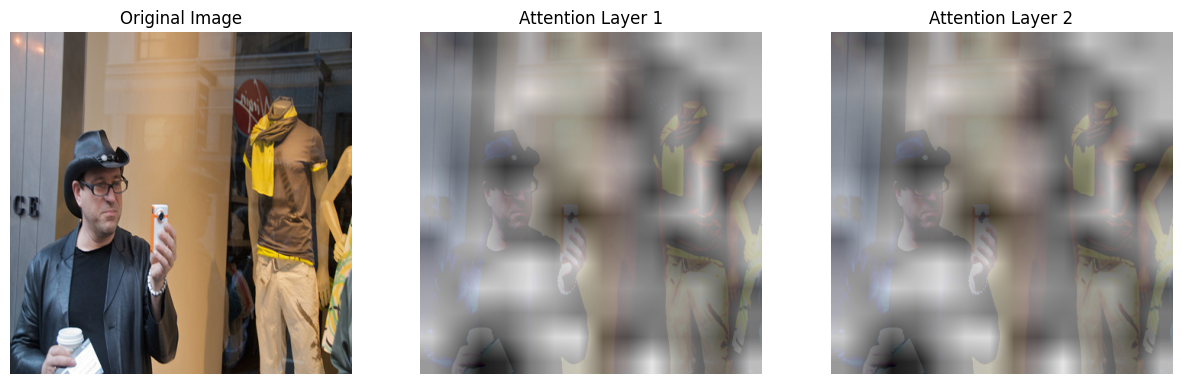

In [61]:
# 3. Generate and display the attention images
attention_figure = generate_attention_images(model, image_path, question_tokens, word_to_index)

if attention_figure:
    plt.show()

## 4.5 Make Model Inference

In [62]:
def perform_inference(trained_model, image_path, question_text, word_to_index, device='cpu', max_question_length=20):
    trained_model.eval()
    trained_model.to(device)

    # 1. Load and preprocess the image
    try:
        img = Image.open(image_path).convert('RGB')
        image_tensor = transform(img).unsqueeze(0).to(device) # Add batch dimension
    except FileNotFoundError:
        print(f"Error: Image not found at {image_path}")
        return None

    # 2. Tokenize and encode the question
    question_tokens = question_text.lower().split()
    question_indices = [word_to_index.get(token, word_to_index.get('<unk>', 0)) for token in question_tokens]

    # Pad or truncate the question to a fixed length (if needed by your model)
    if len(question_indices) < max_question_length:
        question_indices += [word_to_index.get('<pad>', 0)] * (max_question_length - len(question_indices))
    elif len(question_indices) > max_question_length:
        question_indices = question_indices[:max_question_length]

    question_tensor = torch.tensor(question_indices).unsqueeze(1).to(device) # (seq_len, batch_size=1)

    # 3. Create dummy image IDs (if your model uses them)
    image_ids_tensor = torch.tensor([0]).to(device) # Shape (batch_size=1,)

    # 4. Perform the forward pass (no gradient calculation needed for inference)
    with torch.no_grad():
        output = trained_model(image_tensor, question_tensor, image_ids_tensor)

    # 5. Process the output
    # Assuming your output is logits over classes
    probabilities = torch.softmax(output, dim=1)
    predicted_class_index = torch.argmax(probabilities, dim=1).item()

    return predicted_class_index, probabilities.squeeze().cpu().numpy()


In [63]:
predicted_class_index, probs = perform_inference(trained_model=model, image_path=image_path, question_text=question, word_to_index=word_to_index, device=device, max_question_length=20)

In [64]:
print(predicted_class_index)
print(probs)

1
[7.4165739e-02 7.8969771e-01 3.6589336e-04 ... 7.4777541e-05 6.8152767e-05
 1.0014016e-04]


Now that we have the predicted answer ID, we just need to translate this ID to the answer string, which is done with the help of the answer to answer ID mapping, which we had already stored in a file in section 4.1.2. So we load that file to get the final answer as follows.

In [65]:
with open(answer_mapping_file, 'r') as f:
    answer_mapping_df = pd.DataFrame(json.load(f))
predicted_row = answer_mapping_df.loc[answer_mapping_df['answer_id'] == predicted_class_index]

In [66]:
display(predicted_row)

,answer_id,answer,frequency
1,1,yes,825565


In [67]:
print("Answer is: ", predicted_row.iloc[0]["answer"])

Answer is:  yes


### Read annotations

In [68]:
with open(annotation_file, 'r') as f:
    annotation_df = pd.DataFrame(json.load(f)['annotations'])

NameError: name 'annotation_file' is not defined

In [ ]:
display(annotation_df)

In [ ]:
# check if there are any duplicates with question_id
print(any(annotation_df['question_id'].duplicated()))

### Read Questions

In [ ]:
with open(question_file, 'r') as f:
    questions_df = pd.DataFrame(json.load(f)['questions'])

In [ ]:
display(questions_df)

### Merge Annotation and Questions

In [ ]:
merged_df = pd.merge(annotation_df, questions_df, on=('question_id', 'image_id'), how='inner')

In [ ]:
display(merged_df)

In [ ]:
with open(answer_mapping_file, 'r') as f:
    answer_mapping_df = pd.DataFrame(json.load(f))

In [ ]:
display(answer_mapping_df)

In [ ]:
row = answer_mapping_df.iloc[max_ans_index]
print(row)

In [ ]:
truncated_answer_map_df = answer_mapping_df[:max_ans_index]
print(len(truncated_answer_map_df))
row = truncated_answer_map_df.iloc[-1]
print(row)

In [ ]:
joined_df = pd.merge(merged_df, truncated_answer_map_df, left_on='multiple_choice_answer', right_on='answer', how='left')
joined_df = joined_df.drop('answer', axis=1)
joined_df['frequency'] = joined_df['frequency'].fillna(1).astype(int)
joined_df['answer_id'] = joined_df['answer_id'].fillna(max_ans_index).astype(int)

In [ ]:
display(joined_df)

In [ ]:
# Add data to records file
columns_to_save = ['question_id', 'question', 'image_id', 'answer_id']
joined_df = joined_df[columns_to_save]

### Write file for Question word vocab

In [ ]:
from collections import Counter

In [ ]:
questions = pd.read_json(records_output_file)['question']

In [ ]:
all_words = []
for text in questions:
    if isinstance(text, str):
        words = text.lower().split()  # Simple split by whitespace
        all_words.extend(words)
word_frequencies = Counter(all_words)
sorted_word_frequencies = sorted(word_frequencies.items(), key=lambda item: item[1], reverse=True)

In [ ]:
word_mapping = []
idx = 0
for word, freq in sorted_word_frequencies:
    word_mapping.append(
        {
            'index': idx,
            'word': word,
            'frequency': freq
        }
    )
    idx += 1

word_mapping_df = pd.DataFrame(word_mapping)

In [ ]:
word_mapping_df.to_json(question_words_mapping_file, orient='records')

### Read question word mapping file

In [ ]:
word_mapping_df = pd.read_json(question_words_mapping_file)
display(word_mapping_df)

In [ ]:
word_mapping_df[:max_ques_words]

### Update records df to add question encoding

In [ ]:
joined_df = encode_questions(joined_df, word_mapping_df[:max_ques_words])

In [ ]:
display(joined_df)

In [ ]:
# Check length of question with max words
max_length = 0
for question_str in joined_df['question']:
    words = question_str.lower().split()  # Simple whitespace tokenization
    max_length = max(max_length, len(words))

print(max_length)

### Write to Records Output File

In [ ]:
joined_df.to_json(records_output_file, orient='records')